## 역전파 알고리즘의 필요성
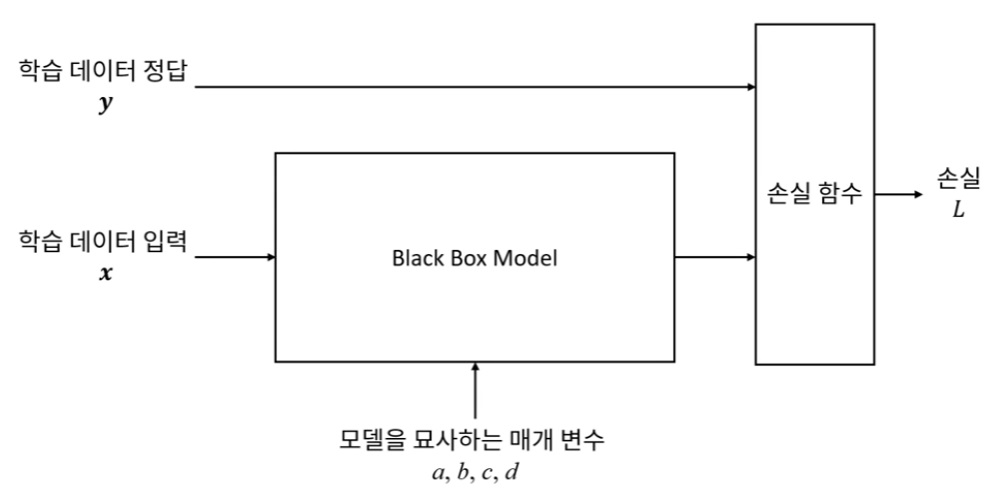
- 매개 변수에 의해 동작이 달라지는 Black Box Model을 나타내는 그림
- 모델을 정확히 알지 못해도 이를 설명할 수 있는 매개변수 몇 개를 가지고 있다면 구현이 가능하다.

### 학습 목표 : 손실을 최소화하는 매개 변수를 찾는다.
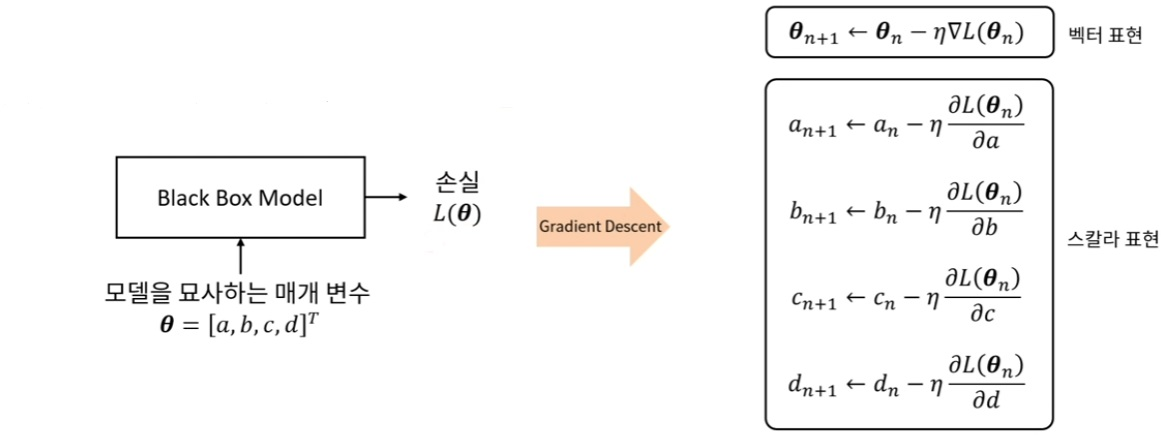
- 벡터 표현 : Gradient 식 표현
- 스칼라식 표현 : 각 a,b,c,d 별로 편미분한 값으로 각각 업데이트

### 수치적 기울기(Numerical Gradient)
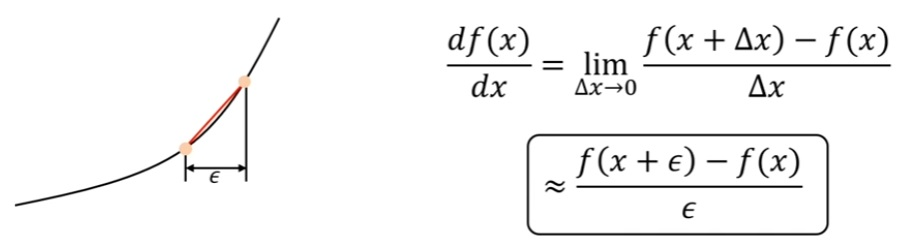
- 미분의 정의로부터 극한 연산을 근사해 수치적 기울기를 구할 수 있다.
- 함수를 정확히 알지 못할 때 엡실론을 이용하여 근사 기울기를 구한다는 정의

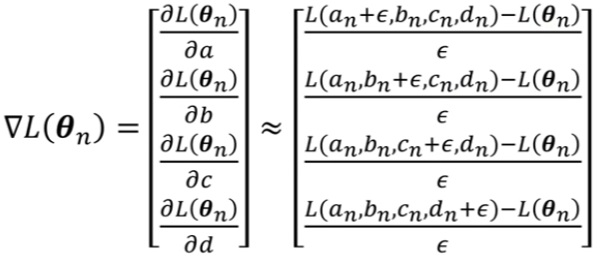
- 각 스칼라 변수를 각각 조금씩 바꾸어 대입해보며 수치적 기울기를 구한다.
  - 이전값과 더 나은 변화가 있는지 일일이 확인하는 절차를 거쳐야 함.
  - N개의 매개 변수로 미분하기 위해 **(N+1)번 더 손실함수를 평가**하여야 한다.

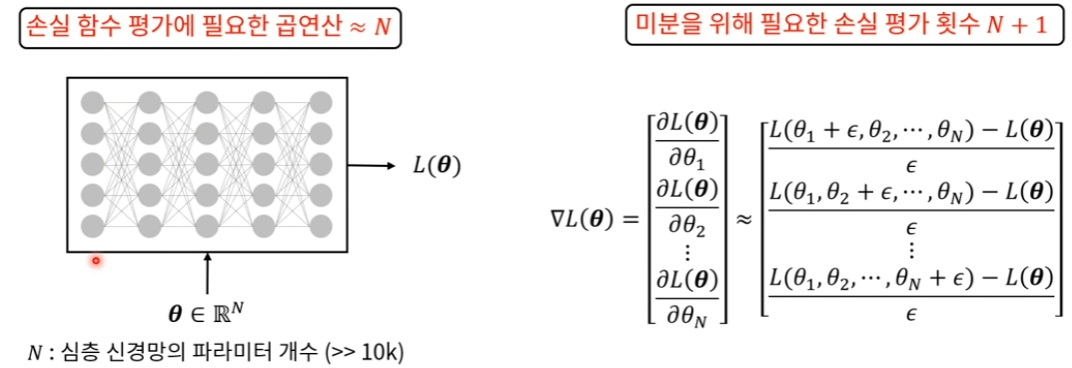
- Gradient Descent 한 스텝 계산을 위한 연산은 N(N+1)번의 곱하기 연산이다.
  - 10만개의 파라미터를 가진 경우 100억회 -> 무언가 잘못되고 있다...

## 이론 기본 : 미분과 연쇄법칙
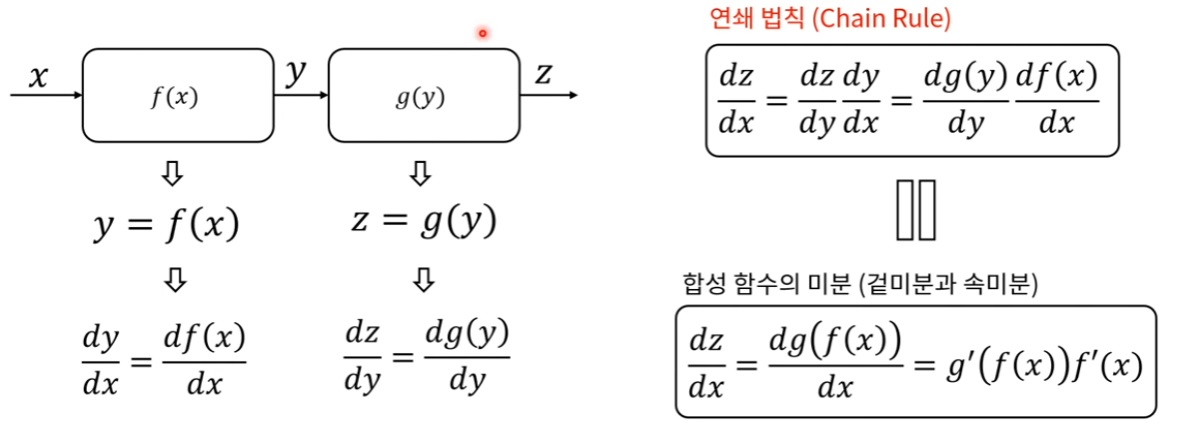
- 우리가 결론적으로 구하고자 하는 것 : $\frac{dz}{dx}$ = z를 x에 대하여 미분한 값
- 연쇄 법칙을 이용한 미분의 계산. 고등학교 과정에서 배우는 합성 함수의 미분과 동일함
- 사전 개념으로 Chain Rule(=합성함수의 미분)이 필수적으로 요구됨

## 연쇄 법칙 확장
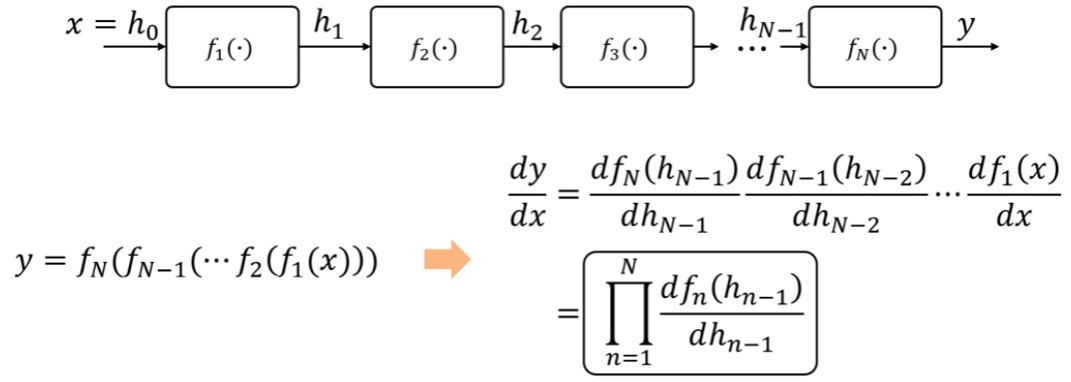
- 연쇄 법칙을 이용하면 연속된 함수의 미분을 각각 미분의 곱으로 표현할 수 있다.

## 심층신경망 관점에서는 보는 합성 함수
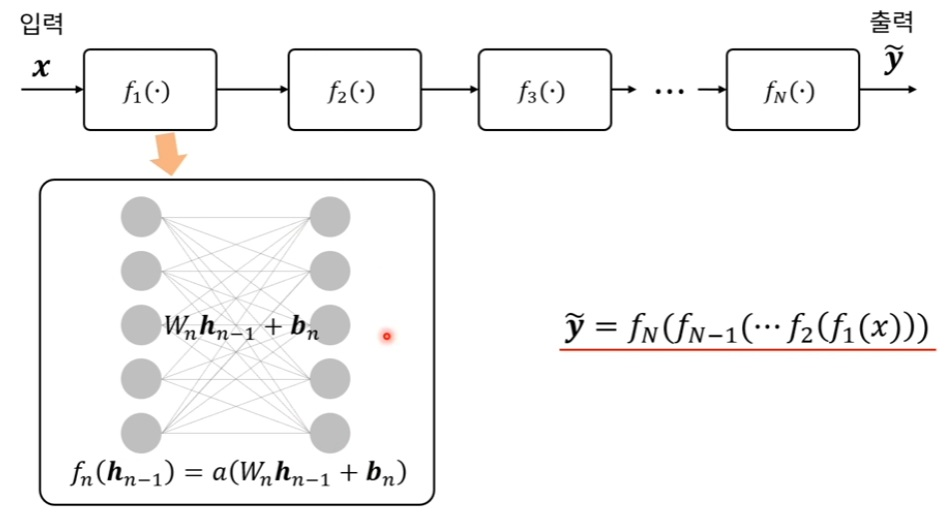
- 심층 신경망의 각 Layer를 하나의 함수로 본다면, 신경망을 합성함수로 표현할 수 있다.

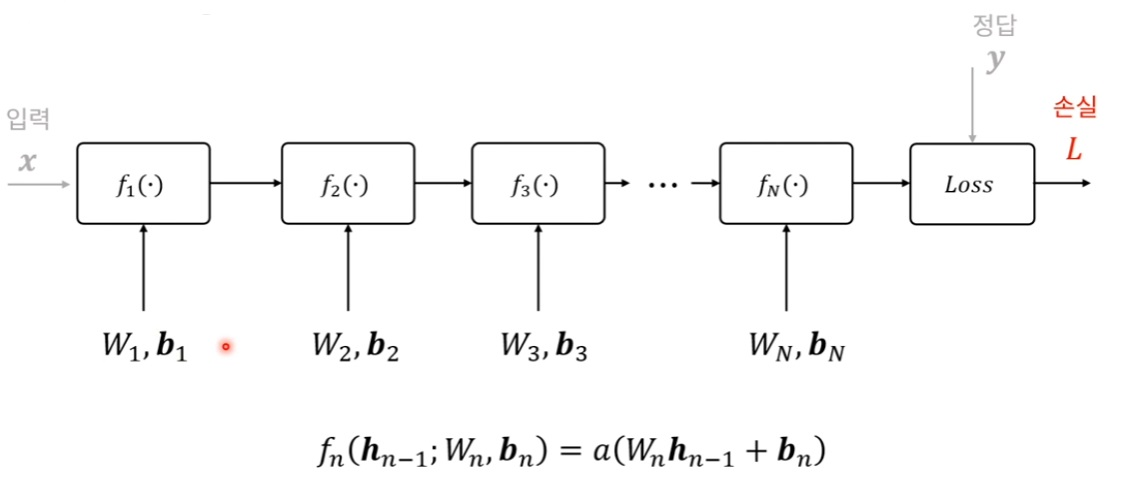
- 이미 손실을 구했다면, 데이터셋의 입력과 출력은 학습 과정에서 중요하지 않다.
  - **손실을 최소화하는 파라미터**만 찾으면 되기 때문임
  - 파라미터 : 최적의 세타값=손실을 최소화시키는 최적의 세타값

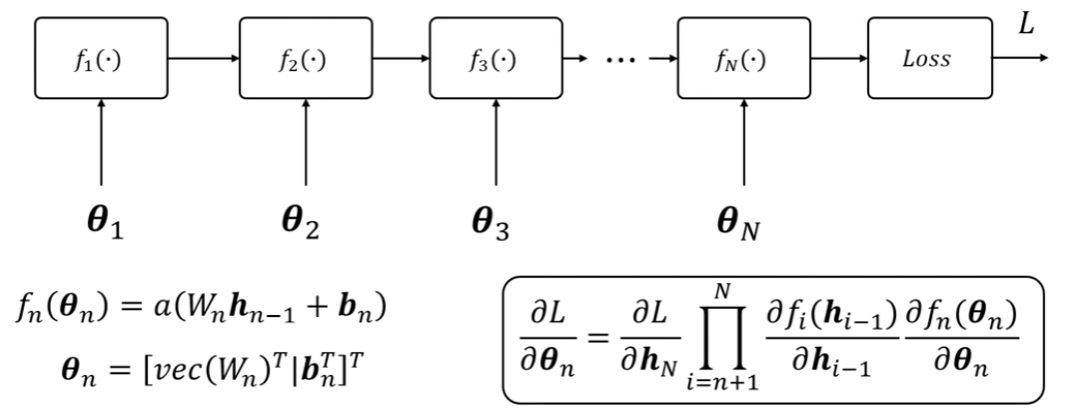
- 미분하고자 하는 경로 사이에 있는 모든 미분 값을 곱하면 원하는 미분을 구할 수 있다
- Loss function의 미분값/fully connected의 미분 값을 모두 안다는 가정에 가능함

## Fully-Connected Layer의 미분
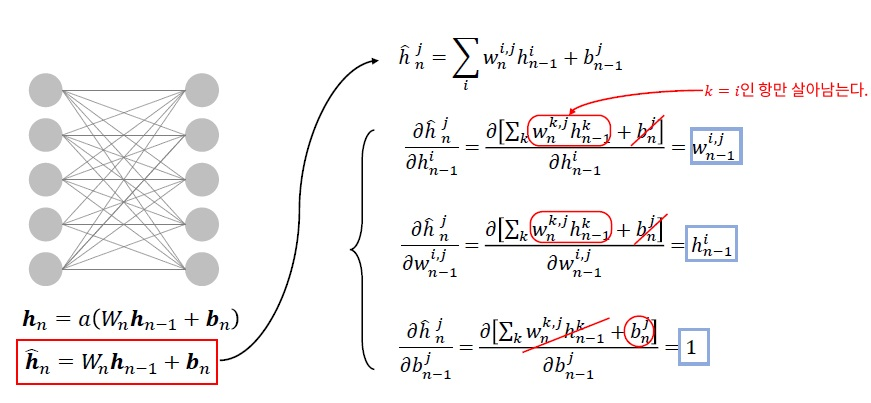
- 출력을 이전 것으로 미분 : 가중치가 사라지고 이전 값만 남아지게 됨
- 출력을 가중치로 미분 : 이전 값이 사라지고 가중치만 남음
- 출력을 편향으로 미분 : 편향의 차수가 1개이기 때문에 1만 남음
- 총 3가지의 미분 방법이 존재함. 그리고 거의 모든 게 사라져 상당히 아름다워짐

## Fully-connected Layer 미분 1차 확장 : 활성함수
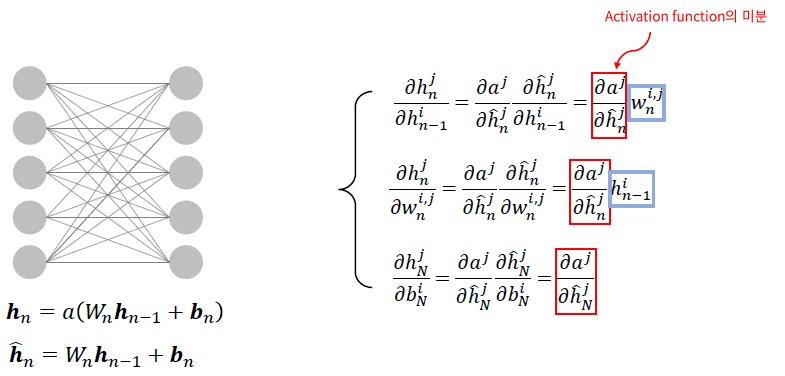
- 위의 그림에서는 활성 함수의 미분을 알고 있다면 쉽게 Fully-Connected Layer를 미분할 수 있게 됨

## 활성 함수의 미분 : Sigmoid 함수
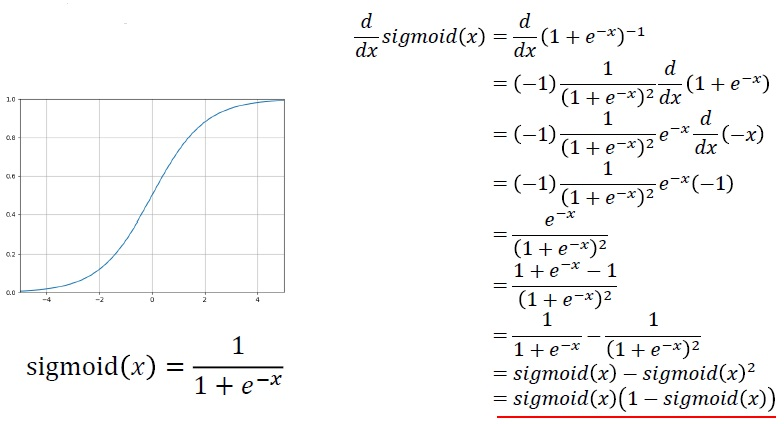
- 초창기 신경망에 가장 많이 쓰였던 활성함수 Sigmoid
- 정리된 결과를 잘만 활용한다면 매우 간단하게 미분할 수 있다.
- $sigmoid(x)$의 미분 : $sigmoid(x)(1-sigmoid(x))$
  - 미분한 값에 $sigmoid(x)$가 포함된다는 것이 의미하는 것 : **DP를 사용한다면 더욱 빨리 문제를 해결**할 수 있다!

## 역전파 알고리즘 간략 정리
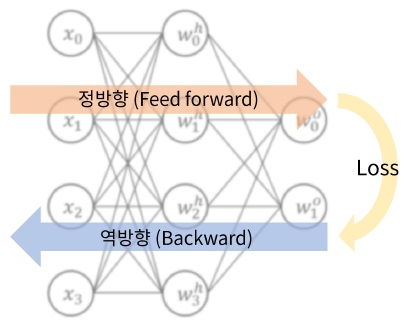
### 오류 역전파 알고리즘(Backpropagation Algorithm;BP)
1. 학습 데이터로 정방향 연산을 하여 Loss를 일단 구한다.
2. 정방향 연산 시, 계층별로 BP에 필요한 중간 결과를 저장한다.
  - $sigmoid(x)$ 함수의 DP 활용을 위해서임
3. Loss를 각 파라미터로 미분함. 이 때 연쇄법칙을 활용하여 각 세타 값을 구함
  - 마지막 계층부터 하나씩 이전 계층으로 연쇄적 계산
  - 역방향 연산 시, 정방향 연산에서 저장한 중간 결과 활용
- 미분의 **연쇄 법칙과 각 함수의 수식적 미분을 이용하면, 단 한번의 손실함수 평가**로 미분을 구할 수 있다.
  - 이 때 중간 결과를 저장해야 하므로 **메모리를 추가로 사용**한다는 특징을 가진다.